In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
df = pd.read_csv('../../data/cancer_classification.csv')

## EDA

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

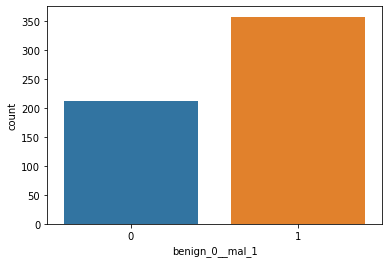

In [5]:
# For classification tasks, it a countplot is a helpful visualization tool for determining the balance of the classes.

sns.countplot(x='benign_0__mal_1', data=df)

This is an okay balance. We clearly have more instance of malignant, but the difference is not extreme.

In [6]:
# Let's check out the correlation between the features themselves.
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


It is very helpful to view the correlation in respect to the label we are trying to predict, in this case `benign_0__mal_1`.

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

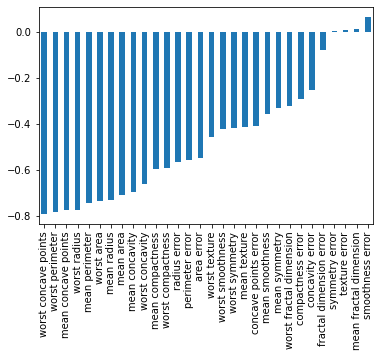

In [8]:
# We have the power of visualization at our fingertips. USE IT.
# Also, grab everything but the last value because self-correlation is 1.
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

We have very correlated features; highly negative correlation, at that, so we should be able to get pretty strong predictions from this data.

<AxesSubplot:>

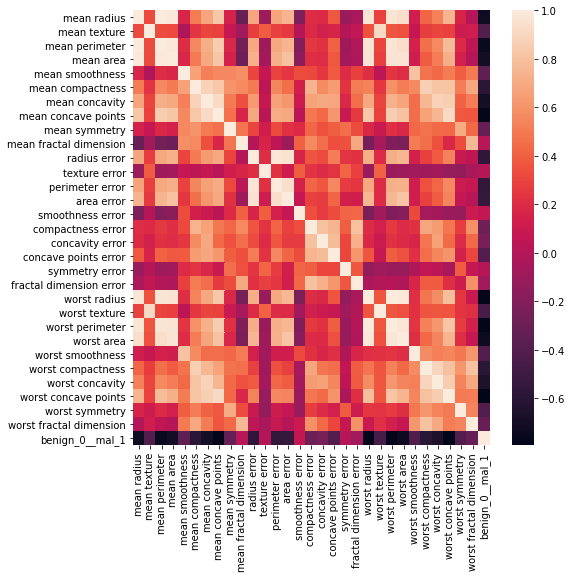

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

## Data Preprocessing

In [10]:
# Train-Test-Split
X = df.drop('benign_0__mal_1', axis=1).values  # drop the target
y = df['benign_0__mal_1'].values  # our target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=101)

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
# Note: We only transform the test set. We do not want to fit our model to the test set (data leakage)

## Building A Model

In [14]:
## Looking at the shape of our data will inform our input layer
X_train.shape

(426, 30)

We will want our input layer to have 30 neurons, 1 for each of our input features

In [16]:
model = Sequential()

model.add(Dense(30, activation='relu'))   # input layer
model.add(Dense(15, activation='relu'))   # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Note on the activation function for our output layer:
# The sigmoid function is a great solution for mapping a real-valued
# number to a probability (a number between 0 and 1). This makes it appropriate for the output unit(s) in a binary classification problem.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))
# By adding the `validation_data`, we will be able to plot our losses.

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 290us/sample - loss: 0.0204 - val_loss: 0.1816
Epoch 2/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0175 - val_loss: 0.1864
Epoch 3/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0172 - val_loss: 0.1787
Epoch 4/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0177 - val_loss: 0.1847
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0225 - val_loss: 0.2016
Epoch 6/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0239 - val_loss: 0.1781
Epoch 7/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0179 - val_loss: 0.1844
Epoch 8/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0189 - val_loss: 0.1890
Epoch 9/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0196 - val_loss: 0.1775
Epoch 10/600
426

In [20]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

This is a clear example of overfitting. The loss of our model is going down, but the validation loss is increasing, meaning we are getting further from the truth.  
We can experiment with early stopping and cut off training at a point when our validation loss begins to increase.

## Early Stopping

In [22]:
# Let's make a new model. We do not want to keep training with the old one.

model = Sequential()

model.add(Dense(30, activation='relu'))   # input layer
model.add(Dense(15, activation='relu'))   # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Note on the activation function for our output layer:
# The sigmoid function is a great solution for mapping a real-valued
# number to a probability (a number between 0 and 1). This makes it appropriate for the output unit(s) in a binary classification problem.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
#help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We are monitoring _validation loss_,
# our objective is to _min_imize the value,
# and we will wait 25 epochs before enforcing the EarlyStop because there may be some noise.
# If we have a loss of zero, we have a perfect fit.

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
            callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0466 - val_loss: 0.1192
Epoch 2/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0436 - val_loss: 0.1100
Epoch 3/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0447 - val_loss: 0.1225
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0442 - val_loss: 0.1163
Epoch 5/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0435 - val_loss: 0.1135
Epoch 6/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0448 - val_loss: 0.1132
Epoch 7/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0453 - val_loss: 0.1148
Epoch 8/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0457 - val_loss: 0.1252
Epoch 9/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0452 - val_loss: 0.1125
Epoch 10/

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is much better. The leveling out is a okay, it is the increasing loss that was bad.

## Dropout  

Another way we can help prevent overfitting is utilizing dropout layers. These will turn off a percentage of neurons randomly.  After each batch, the percentage of neurons in the layer will not have their weights and biases updated. Between .2 and .5 is a common amount. It is a random subselection of that 20%-50% that gets turned off.

In [ ]:
# Let's make a new model, again.

model = Sequential()

model.add(Dense(30, activation='relu'))   # input layer
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))   # hidden layer
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # output layer

# Note on the activation function for our output layer:
# The sigmoid function is a great solution for mapping a real-valued
# number to a probability (a number between 0 and 1). This makes it appropriate for the output unit(s) in a binary classification problem.

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
            callbacks=[early_stop])